In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

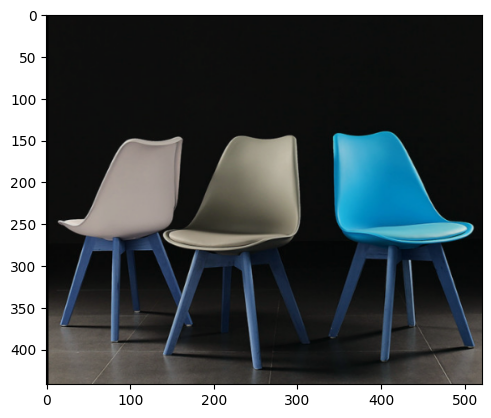

In [179]:
# openCV reads in BGR
img_origin = cv2.imread('ex.png')
plt.imshow(img_origin)

In [180]:
import sys
from  PIL  import Image

img_origin = cv2.imread('ex.png', cv2.IMREAD_UNCHANGED)
original = img_origin.copy()

l = int(max(5, 6))
u = int(min(6, 6))

ed = cv2.cvtColor(img_origin, cv2.COLOR_BGR2GRAY)
edges = cv2.GaussianBlur(img_origin, (21, 51), 3)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(edges, l, u)

_, thresh = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY  + cv2.THRESH_OTSU)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=4)

data = mask.tolist()
sys.setrecursionlimit(10**8)
for i in  range(len(data)):
    for j in  range(len(data[i])):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
    for j in  range(len(data[i])-1, -1, -1):
        if data[i][j] !=  255:
            data[i][j] =  -1
        else:
            break
image = np.array(data)
image[image !=  -1] =  255
image[image ==  -1] =  0

mask = np.array(image, np.uint8)

result = cv2.bitwise_and(original, original, mask=mask)
result[mask ==  0] =  255
cv2.imwrite('bg.png', result)

img = Image.open('bg.png')
img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] ==  255  and item[1] ==  255  and item[2] ==  255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("img.png", "PNG")

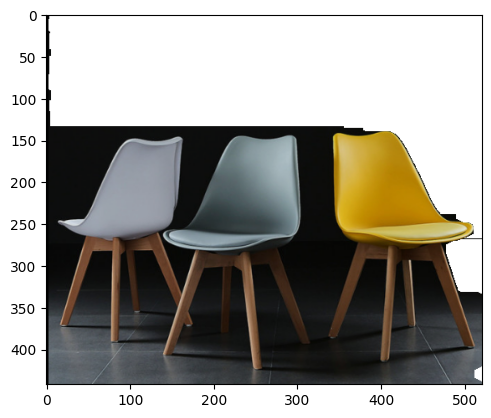

In [181]:
# converting from BGR to RGB
img = cv2.imread("img.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img)

In [182]:
# reshape the image
img=img.reshape((img.shape[1]*img.shape[0],3))

In [183]:
# KMeans
kmeans=KMeans(n_clusters=5)
s=kmeans.fit(img)

In [184]:
# labels
labels=kmeans.labels_
print(labels)
labels=list(labels)

[1 1 1 ... 3 3 3]


In [185]:
# determine centroids of clusters
centroid=kmeans.cluster_centers_
print(centroid)

[[147.71862075 154.15167991 154.89892653]
 [ 20.24944204  19.18208277  17.394132  ]
 [254.90407552 254.91386222 254.90223201]
 [ 82.21271856  77.30825023  73.27009455]
 [192.59897759 148.89020842  27.39913488]]


In [186]:
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)

[0.09331167872434667, 0.3326920905672176, 0.35098705065962604, 0.1675901720499214, 0.05541900799888832]


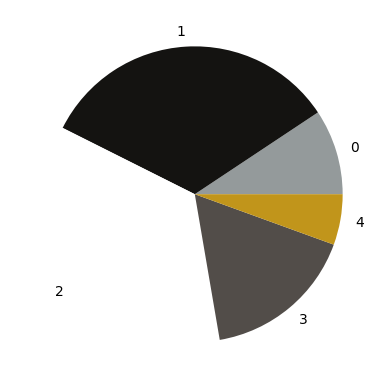

In [187]:
# plot a pie chart
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

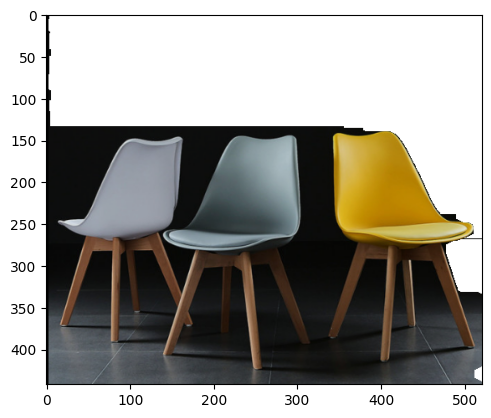

In [188]:
# https://intrepidgeeks.com/tutorial/extract-color-from-image

import cv2
import matplotlib.colors as cs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#set path to image
imgpath = 'img.png'
#set number of cluster for kmeans
clusterno = 5

#read image
img = cv2.imread(imgpath)
#convert bgr to rgb
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#reshape img array
n_img = np.reshape(img,(img.shape[0]*img.shape[1],3))

In [189]:
#use kmeans to find cluster of color
clt = KMeans(n_clusters=clusterno)
clt.fit(n_img)

#get unique value of labels in kmeans
labels = np.unique(clt.labels_)

#find the pixel numbers of each color that is set by cluster number
hist,_ = np.histogram(clt.labels_,bins=np.arange(len(labels)+1))

#declare list to hold color to be used in chart
colors = []

#declare list to hold hex color code for labeling in chart
hexlabels = []

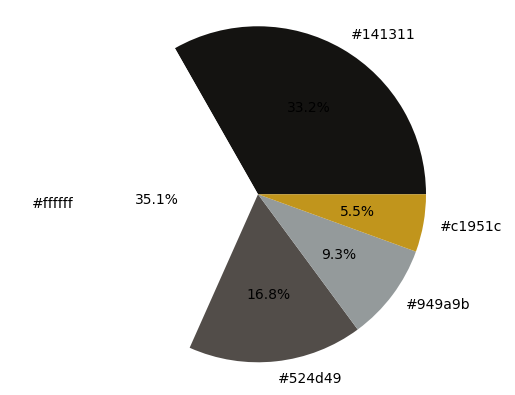

In [190]:
#get the main color
for i in range(clt.cluster_centers_.shape[0]):
  colors.append(tuple(clt.cluster_centers_[i]/255))
  hexlabels.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))

#create pie chart for color
plt.pie(hist,labels=hexlabels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [191]:
hexlabels

['#141311', '#ffffff', '#524d49', '#949a9b', '#c1951c']

In [192]:
def hex2rgb(hex_value):
    h = hex_value.strip("#") 
    rgb = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
    return rgb

In [193]:
hex2rgb(hexlabels[0])

(20, 19, 17)

In [194]:
rgblabels = []
for i in range(len(hexlabels)):
    rgblabels.append(hex2rgb(hexlabels[i]))

rgblabels

[(20, 19, 17), (255, 255, 255), (82, 77, 73), (148, 154, 155), (193, 149, 28)]

In [195]:
import colorsys
def rgb2hsv(r,g,b):
    return colorsys.rgb_to_hsv(r,g,b)

In [196]:
hsvlabels = []
for i in range(len(rgblabels)):
    hsvlabels.append(rgb2hsv(rgblabels[i][0], rgblabels[i][1], rgblabels[i][2]))

hsvlabels

# hsv (hue 색상, saturation 채도, value 명도)(v 대신 i,b,l 도 됨)
# H : 0 ~ 360
# S : 0 ~ 100 (진함)
# V : 0 ~ 100 (밝음)


[(0.11111111111111112, 0.15, 20),
 (0.0, 0.0, 255),
 (0.07407407407407407, 0.10975609756097561, 82),
 (0.5238095238095238, 0.04516129032258064, 155),
 (0.12222222222222223, 0.8549222797927462, 193)]

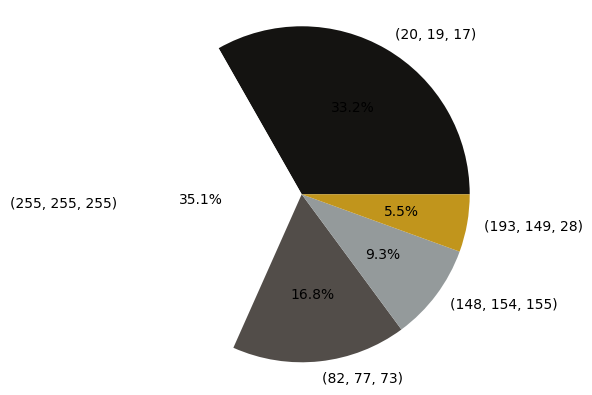

In [197]:
#create pie chart for color
plt.pie(hist,labels=rgblabels,colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

[(0.7548602223797801, 0.5836606422190084, 0.10860762523826199), (0.9996203415420699, 0.999658234610264, 0.9996089881773687), (0.07905671527495499, 0.07492283291301326, 0.06794270454435855), (0.5786670165789118, 0.6042200875145068, 0.6076397507604203), (0.32156893107978235, 0.30231299374473397, 0.28649049110444935)]
['#c0951c', '#ffffff', '#141311', '#949a9b', '#524d49']


[(0.12296747967479675, 0.8541666666666666, 192),
 (0.0, 0.0, 255),
 (0.11111111111111112, 0.15, 20),
 (0.5238095238095238, 0.04516129032258064, 155),
 (0.07407407407407407, 0.10975609756097561, 82)]

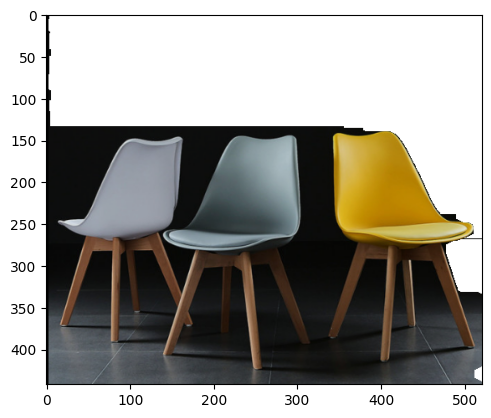

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import colorsys

def hex2rgb(hex_value):
    h = hex_value.strip("#") 
    rgb = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
    return rgb


def rgb2hsv(r,g,b):
    return colorsys.rgb_to_hsv(r,g,b)

def kmeans_color_to_hsv(img):

    # reshape the image
    img=img.reshape((img.shape[1]*img.shape[0],3))

    #use kmeans to find cluster of color
    clt = KMeans(n_clusters=clusterno)
    clt.fit(n_img)

    #get unique value of labels in kmeans
    labels = np.unique(clt.labels_)

    #find the pixel numbers of each color that is set by cluster number
    hist,_ = np.histogram(clt.labels_,bins=np.arange(len(labels)+1))

    #declare list to hold color to be used in chart
    colors = []

    #declare list to hold hex color code for labeling in chart
    hexlabels = []

    #declare list to hold rgb color code for labeling in chart
    rgblabels = []

    #declare list to hold hsv color code for labeling in chart
    hsvlabels = []

    #get the main color
    for i in range(clt.cluster_centers_.shape[0]):
        colors.append(tuple(clt.cluster_centers_[i]/255))
        hexlabels.append(cs.to_hex(tuple(clt.cluster_centers_[i]/255)))
        
    print(colors)

    print(hexlabels)

    for i in range(len(hexlabels)):
        rgblabels.append(hex2rgb(hexlabels[i]))

    for i in range(len(rgblabels)):
        hsvlabels.append(rgb2hsv(rgblabels[i][0], rgblabels[i][1], rgblabels[i][2]))

    # #create pie chart for color
    # plt.pie(hist,labels=hexlabels,colors=colors,autopct='%1.1f%%')
    # plt.axis('equal')
    # plt.show()

    return hsvlabels


#read image
img = cv2.imread('img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

final_hsvlabels = kmeans_color_to_hsv(img)

final_hsvlabels


In [199]:
# calculate complementary

ori_r = 100
ori_g = 82
ori_b = 190
print('original rgb : ', ori_r , ', ' , ori_g, ', ', ori_b)

def complementary(r, g, b):
    total = max(r,g,b) + min(r,g,b)
    new_r = total-r
    new_g = total-g
    new_b = total-b

    return (new_r, new_g, new_b)

def rgb2hex(rgb):
    return '%02x%02x%02x' % rgb

print('original hex : ', rgb2hex((ori_r, ori_g, ori_b)))

new_r, new_g, new_b = complementary(ori_r, ori_g, ori_b)
print('new rgb : ', new_r , ', ' , new_g, ', ', new_b)

print('new hex : ', rgb2hex((new_r, new_g, new_b)))


original rgb :  100 ,  82 ,  190
original hex :  6452be
new rgb :  172 ,  190 ,  82
new hex :  acbe52


In [200]:
# complementary in hsv
print('original hsv : ', rgb2hsv(ori_r, ori_g, ori_b))

print('new hsv : ', rgb2hsv(new_r, new_g, new_b))

original hsv :  (0.6944444444444445, 0.5684210526315789, 190)
new hsv :  (0.19444444444444442, 0.5684210526315789, 190)


In [201]:
import colorsys

def hsv2rgb(r,g,b):
    return colorsys.hsv_to_rgb(r,g,b)

print('new_changed_rgb : ', hsv2rgb(0.19444444444444442, 0.5684210526315789, 150))
hsv_s = [0.19444444444444442, 0.5684210526315789, 190]
rgb_s = [135.78947368421052, 150, 64.73684210526316]

new_changed_rgb :  (135.78947368421052, 150, 64.73684210526316)


In [202]:
from scipy.spatial import distance
import copy
import math
import operator

def is_warm(rgb_s):
    warm_b_std = [205, 141, 43]
    cold_b_std = [36, 61, 135]

    warm_dist = 0
    cold_dist = 0

    body_part = ['r', 'g', 'b']
    for i in range(3):
        warm_dist += abs(hsv_s[i] - warm_b_std[i])
        cold_dist += abs(hsv_s[i] - cold_b_std[i])
    if(warm_dist <= cold_dist):
        return 1 #warm
    else:
        return 0 #cold

#hsv값의 s를 기준으로 밝음과 어둠을 나눔
def is_WarmLight(hsv_s):
    if(hsv_s[2] > 60):
        return 1 #WarmLight
    else:
        return 0 #WarmDark
    
def is_ColdLight(hsv_s):
    if(hsv_s[2] > 60):
        return 1 #ColdLight
    else:
        return 0 #ColdDark

In [203]:
if(is_warm(hsv_s)):
        if(is_WarmLight(hsv_s)):
            tone = 'WarmLight'
        else:
            tone = 'WarmDark'
else:
        if(is_ColdLight(hsv_s)):
            tone = 'ColdLight'
        else:
            tone = 'ColdDark'

In [204]:
import pandas as pd

df = pd.read_csv('color.csv')
df.set_index('Tone', inplace=True)

# Print Result
print("Current Color Tone : " + tone)
print("Recommendation Color : ")
df.loc[tone]

Current Color Tone : ColdLight
Recommendation Color : 


,_key,hsva/h,hsva/s,hsva/v,hsva/a
Tone,,,,,
ColdLight,grape-0,288,0.097166,0.988,1
ColdLight,grape-1,288,0.163265,0.980,1
ColdLight,grape-2,288,0.230453,0.972,1
ColdLight,grape-3,288,0.385744,0.954,1
ColdLight,grape-4,288,0.547009,0.936,1
ColdLight,violet-0,255,0.097166,0.988,1
ColdLight,violet-1,255,0.163265,0.980,1
ColdLight,violet-2,255,0.230453,0.972,1
ColdLight,violet-3,255,0.385744,0.954,1


In [4]:
import pandas as pd

# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

df = pd.read_csv('ColorDataset.csv')
print(df)

         Tone            key  hsva/h  hsva/s  hsva/v  hsva/a
0    WARMSOFT     Colorful-0      51      82      97       1
1    WARMSOFT     Colorful-1      46      77      89       1
2    WARMSOFT     Colorful-2     340      72      73       1
3    WARMSOFT       Casual-0     348      79      82       1
4    WARMSOFT       Casual-1       0       1     100       1
5    WARMSOFT       Casual-2     210      88      57       1
6    WARMSOFT       Bright-0      27      66      92       1
7    WARMSOFT       Bright-1     300       1     100       1
8    WARMSOFT       Bright-2     357      74      84       1
9    WARMSOFT    Enjoyable-0      15      80      91       1
10   WARMSOFT    Enjoyable-1      55      66      96       1
11   WARMSOFT    Enjoyable-2     197      93      55       1
12   WARMSOFT       Pretty-0      51      84      98       1
13   WARMSOFT       Pretty-1      60      11      99       1
14   WARMSOFT       Pretty-2     349      61      81       1
15   WARMSOFT    Childli

In [44]:
hsv_s = [0.19444444444444442, 0.5684210526315789, 190]

df = pd.read_csv('ColorDataset.csv')
hsva_h = df["hsva/h"]
hsva_s = df["hsva/s"]
hsva_v = df["hsva/v"]

#sv값 [0,1] 정규화
from sklearn.preprocessing import minmax_scale

hsva_s = pd.DataFrame(data=minmax_scale(hsva_s))
hsva_v = pd.DataFrame(data=minmax_scale(hsva_v))

hsva_s.columns = ["hsva_s"]
hsva_v.columns = ["hsva_v"]

In [ ]:
#h값 [0,2pi] 정규화
df = pd.read_csv('ColorDataset.csv')
hsva_h = df["hsva/h"]

from sklearn.preprocessing import minmax_scale

hsva_h = pd.DataFrame(data=minmax_scale(hsva_h))

In [76]:
#논문에 나온 hsv distance 계산 방식

hsv_s = [0.19444444444444442, 0.5684210526315789, 190]

df = pd.read_csv('ColorDataset.csv')
hsva_h = df["hsva/h"].to_numpy()
hsva_s = df["hsva/s"].to_numpy()
hsva_v = df["hsva/v"].to_numpy()
dist = []

for i in range(len(hsva_h)):
    if (hsv_s[0]-hsva_h[i]) < 180:
        h_diff = hsv_s[0]-hsva_h[i]
    else:
        h_diff = 360 - (hsv_s[0]-hsva_h)
    for j in range(len(hsva_s)):
        for k in range(len(hsva_v)):
            distance = (hsv_s[1]*abs(h_diff) + abs(hsv_s[1]-hsva_s[j]) + abs(hsv_s[2]-hsva_v[k]))
    dist.append(distance)
    
print(dist)
min(dist)

num = dist.index(min(dist))
df.iloc[num]

[215.31052631578947, 212.46842105263158, 379.5842105263158, 384.13157894736844, 186.5421052631579, 305.6894736842105, 201.66842105263157, 356.84736842105264, 389.2473684210526, 194.84736842105264, 217.5842105263158, 298.3, 215.31052631578947, 220.42631578947368, 384.7, 190.8684210526316, 215.31052631578947, 265.9, 202.23684210526315, 281.8157894736842, 193.1421052631579, 201.1, 213.60526315789474, 222.7, 201.1, 215.87894736842105, 217.5842105263158, 202.23684210526315, 194.84736842105264, 195.9842105263158, 330.13157894736844, 387.54210526315785, 322.7421052631579, 195.4157894736842, 305.6894736842105, 388.67894736842106, 213.03684210526316, 384.13157894736844, 300.5736842105263, 311.37368421052633, 387.54210526315785, 303.9842105263158, 389.81578947368416, 371.62631578947367, 214.17368421052632, 390.38421052631577, 212.46842105263158, 319.9, 384.7, 384.13157894736844, 334.11052631578946, 269.87894736842105, 390.9526315789474, 317.62631578947367, 369.35263157894735, 322.7421052631579, 

Tone      WARMSOFT
key       Casual-1
hsva/h           0
hsva/s           1
hsva/v         100
hsva/a           1
Name: 4, dtype: object